# Overview
This notebook is a tutorial for big data analysis using pyspark.

## Contents
1. Load Data
2. Use RDD to query data
3. Use Spark DataFrame to query data
4. Use Spark SQL to query data
5. Perform Spark K-means

In [1]:
# spark entry point
from pyspark import SparkContext

# others
import pandas as pd
from csv import reader

# config
sc = SparkContext(master="local[4]")


# data path
# url = 'https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/'
data_path = '/Users/Kevin/Downloads/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'

## 1. read data

In [7]:
# read data from the data storage
crime_data_lines = sc.textFile(data_path)

# prepare data - strip "
crimes_clean = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])

# get header (column names)
header = crimes_clean.first()

# remove the first line of data
rdd_crimes = df_crimes.filter(lambda x: x != header)

### 2. RDD Query

In [17]:
# inspection
header

['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

In [11]:
# inspection
rdd_crimes.take(1)

[['150060275',
  'NON-CRIMINAL',
  'LOST PROPERTY',
  'Monday',
  '01/19/2015',
  '14:00',
  'MISSION',
  'NONE',
  '18TH ST / VALENCIA ST',
  '-122.42158168137',
  '37.7617007179518',
  '(37.7617007179518, -122.42158168137)',
  '15006027571000']]

In [15]:
# get data size
print('num rows:', rdd_crimes.count())

num rows: 2215024


In [16]:
# get number of partitions
print('num partitions:', rdd_crimes.getNumPartitions())

num partitions: 14


In [21]:
# get all distinct Crime Category
rdd_crimes.map(lambda x: x[1]).distinct().collect()

['OTHER OFFENSES',
 'DISORDERLY CONDUCT',
 'PROSTITUTION',
 'VANDALISM',
 'DRUG/NARCOTIC',
 'FRAUD',
 'LIQUOR LAWS',
 'TREA',
 'GAMBLING',
 'NON-CRIMINAL',
 'SECONDARY CODES',
 'KIDNAPPING',
 'PORNOGRAPHY/OBSCENE MAT',
 'DRUNKENNESS',
 'STOLEN PROPERTY',
 'BRIBERY',
 'ARSON',
 'TRESPASS',
 'EMBEZZLEMENT',
 'FORGERY/COUNTERFEITING',
 'LARCENY/THEFT',
 'DRIVING UNDER THE INFLUENCE',
 'FAMILY OFFENSES',
 'LOITERING',
 'SEX OFFENSES, NON FORCIBLE',
 'BURGLARY',
 'MISSING PERSON',
 'EXTORTION',
 'SUSPICIOUS OCC',
 'RUNAWAY',
 'WEAPON LAWS',
 'BAD CHECKS',
 'VEHICLE THEFT',
 'SUICIDE',
 'ROBBERY',
 'RECOVERED VEHICLE',
 'SEX OFFENSES, FORCIBLE',
 'ASSAULT',
 'WARRANTS']

In [23]:
# get case count
rdd_crimes.map(lambda x: x[1]).countByValue()

defaultdict(int,
            {'NON-CRIMINAL': 238323,
             'ROBBERY': 55867,
             'ASSAULT': 194694,
             'SECONDARY CODES': 25831,
             'VANDALISM': 116059,
             'BURGLARY': 91543,
             'LARCENY/THEFT': 480448,
             'DRUG/NARCOTIC': 119628,
             'WARRANTS': 101379,
             'VEHICLE THEFT': 126602,
             'OTHER OFFENSES': 309358,
             'WEAPON LAWS': 22234,
             'ARSON': 3931,
             'MISSING PERSON': 64961,
             'DRIVING UNDER THE INFLUENCE': 5672,
             'SUSPICIOUS OCC': 80444,
             'RECOVERED VEHICLE': 8716,
             'DRUNKENNESS': 9826,
             'TRESPASS': 19449,
             'FRAUD': 41542,
             'DISORDERLY CONDUCT': 10040,
             'SEX OFFENSES, FORCIBLE': 11742,
             'FORGERY/COUNTERFEITING': 23050,
             'KIDNAPPING': 5346,
             'EMBEZZLEMENT': 2988,
             'STOLEN PROPERTY': 11891,
             'LIQUOR LAWS':

In [24]:
# get case count by date
rdd_crimes.map(lambda x: x[3]).countByValue()

defaultdict(int,
            {'Monday': 306587,
             'Sunday': 294592,
             'Tuesday': 315135,
             'Saturday': 320593,
             'Friday': 337941,
             'Wednesday': 324020,
             'Thursday': 316156})

In [44]:
# get case count by hour
rdd_crimes.map(lambda x: pd.Timestamp(x[5]).hour).countByValue()

defaultdict(int,
            {14: 112078,
             15: 120190,
             19: 126404,
             16: 125548,
             21: 109559,
             17: 135481,
             12: 132631,
             7: 55551,
             3: 35596,
             11: 97620,
             22: 113915,
             20: 115010,
             1: 65182,
             18: 140918,
             0: 113096,
             23: 104732,
             8: 82459,
             9: 89303,
             13: 108540,
             2: 54550,
             4: 25285,
             6: 33494,
             5: 22413,
             10: 95469})

In [55]:
# get start date
print('data begins at', rdd_crimes.map(lambda x: pd.Timestamp(x[4])).min())
# get end date
print('data ends at', rdd_crimes.map(lambda x: pd.Timestamp(x[4])).max())

data begins at 2003-01-01 00:00:00
data ends at 2018-05-15 00:00:00


In [56]:
# get case count by district
rdd_crimes.map(lambda x: x[6]).countByValue()

defaultdict(int,
            {'MISSION': 300076,
             'TENDERLOIN': 191746,
             'NORTHERN': 272713,
             'RICHMOND': 116818,
             'BAYVIEW': 221000,
             'CENTRAL': 226255,
             'PARK': 125479,
             'TARAVAL': 166971,
             'SOUTHERN': 399785,
             'INGLESIDE': 194180,
             '': 1})

In [57]:
# get case count by district on Sunday
rdd_crimes.filter(lambda x: x[3] == 'Sunday').map(lambda x: x[6]).countByValue()

defaultdict(int,
            {'TENDERLOIN': 24344,
             'RICHMOND': 15750,
             'MISSION': 40093,
             'NORTHERN': 37327,
             'BAYVIEW': 29104,
             'PARK': 16776,
             'CENTRAL': 32096,
             'TARAVAL': 21308,
             'SOUTHERN': 52647,
             'INGLESIDE': 25146,
             '': 1})

In [294]:
# # get case count in Downtown on Sunday
# from math import sqrt
# center = (37.791512, -122.403140)
# sample_loc = (37.7841907151119, -122.414406029855)
# radius = sqrt((center[0] - sample_loc[0])**2 + (center[1] - sample_loc[1])**2)

# rdd_crimes \
#     .filter(lambda x: x[3] == 'Sunday') \
#     .filter(lambda x: sqrt((float(x[9])-center[0])**2 + (float(x[10])-center[1])**2) < radius) \
#     .count()

rdd_crimes.filter(lambda x: x[3] == 'Sunday').filter(lambda x: x[6] == 'TENDERLOIN').count()

24344

### 3. DataFrame Query

In [60]:
# dataframe / SQL entry point
from pyspark.sql import SQLContext, SparkSession
# spark schema utils
from pyspark.sql.types import *

# spark structure data (dataframe / SQL) entry point
sql_sc = SQLContext(sc)
spark = SparkSession(sc)

### 1). manually create dataframe using rdd, and self-defined schema

In [180]:
# manual define schema
schema = StructType([
    StructField('IncidntNum', IntegerType(), True),
    StructField('Category', StringType(), True),
    StructField('Descript', StringType(), True),
    StructField('DayOfWeek', StringType(), True),
    StructField('Date', StringType(), True),
    StructField('Time', StringType(), True),
    StructField('PdDistrict', StringType(), True),
    StructField('Resolution', StringType(), True),
    StructField('Address', StringType(), True),
    StructField('X', FloatType(), True),
    StructField('Y', FloatType(), True),
    StructField('Location', StringType(), True),
    StructField('PdId', LongType(), True),
])
# convert rdd to proper type
rdd_crimes_type_converted = rdd_crimes.map(
    lambda x:
    [
       int(x[0]),
       x[1],
       x[2],
       x[3],
       x[4],
       x[5],
       x[6],
       x[7],
       x[8],
       float(x[9]),
       float(x[10]),
       x[11],
       int(x[12]),
   ]).cache()
# create data from rdd and schema
df_crimes = sql_sc.createDataFrame(rdd_crimes_type_converted, schema)
df_crimes.show(1)

+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
|IncidntNum|    Category|     Descript|DayOfWeek|      Date| Time|PdDistrict|Resolution|             Address|               X|               Y|            Location|          PdId|
+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
| 150060275|NON-CRIMINAL|LOST PROPERTY|   Monday|01/19/2015|14:00|   MISSION|      NONE|18TH ST / VALENCI...|-122.42158168137|37.7617007179518|(37.7617007179518...|15006027571000|
+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
only showing top 1 row



### 2). create dataframe using rdd and list of column names

In [179]:
# create DataFrame from rdd and column name (type inference)
df_crimes = sql_sc.createDataFrame(rdd_crimes_type_converted, header)
df_crimes.show(1)

+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
|IncidntNum|    Category|     Descript|DayOfWeek|      Date| Time|PdDistrict|Resolution|             Address|               X|               Y|            Location|          PdId|
+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
| 150060275|NON-CRIMINAL|LOST PROPERTY|   Monday|01/19/2015|14:00|   MISSION|      NONE|18TH ST / VALENCI...|-122.42158168137|37.7617007179518|(37.7617007179518...|15006027571000|
+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
only showing top 1 row



### 3). create dataframe using sparking session reading file directly

In [192]:
df_crimes = spark.read.csv(data_path, header=True, inferSchema=True, ignoreTrailingWhiteSpace=True)

In [197]:
df_crimes.show(1)

+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
|IncidntNum|    Category|     Descript|DayOfWeek|      Date| Time|PdDistrict|Resolution|             Address|               X|               Y|            Location|          PdId|
+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
| 150060275|NON-CRIMINAL|LOST PROPERTY|   Monday|01/19/2015|14:00|   MISSION|      NONE|18TH ST / VALENCI...|-122.42158168137|37.7617007179518|(37.7617007179518...|15006027571000|
+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
only showing top 1 row



In [208]:
# inspection
print('columns:', df_crimes.columns)
print()
print('counts:', df_crimes.count())
print()
print('column types:', df_crimes.dtypes)
print()
print('schema:')
print(df_crimes.printSchema())
print()
print('num partitions:', df_crimes.rdd.getNumPartitions())

columns: ['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId']

counts: 2215024

column types: [('IncidntNum', 'int'), ('Category', 'string'), ('Descript', 'string'), ('DayOfWeek', 'string'), ('Date', 'string'), ('Time', 'string'), ('PdDistrict', 'string'), ('Resolution', 'string'), ('Address', 'string'), ('X', 'double'), ('Y', 'double'), ('Location', 'string'), ('PdId', 'bigint')]

schema:
root
 |-- IncidntNum: integer (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- PdId: long (nullable = true)

None

num partitio

In [228]:
# get all distinct Crime Category
df_crimes.select('Category').distinct().show()

+--------------------+
|            Category|
+--------------------+
|               FRAUD|
|             SUICIDE|
|         LIQUOR LAWS|
|     SECONDARY CODES|
|     FAMILY OFFENSES|
|      MISSING PERSON|
|      OTHER OFFENSES|
|DRIVING UNDER THE...|
|            WARRANTS|
|               ARSON|
|FORGERY/COUNTERFE...|
|            GAMBLING|
|             BRIBERY|
|             ASSAULT|
|         DRUNKENNESS|
|           EXTORTION|
|                TREA|
|         WEAPON LAWS|
|           LOITERING|
|      SUSPICIOUS OCC|
+--------------------+
only showing top 20 rows



In [227]:
# get case count
df_crimes.groupby('Category').count().show()

+--------------------+------+
|            Category| count|
+--------------------+------+
|               FRAUD| 41542|
|             SUICIDE|  1292|
|         LIQUOR LAWS|  4083|
|     SECONDARY CODES| 25831|
|     FAMILY OFFENSES|  1183|
|      MISSING PERSON| 64961|
|      OTHER OFFENSES|309358|
|DRIVING UNDER THE...|  5672|
|            WARRANTS|101379|
|               ARSON|  3931|
|FORGERY/COUNTERFE...| 23050|
|            GAMBLING|   348|
|             BRIBERY|   813|
|             ASSAULT|194694|
|         DRUNKENNESS|  9826|
|           EXTORTION|   741|
|                TREA|    14|
|         WEAPON LAWS| 22234|
|           LOITERING|  2430|
|      SUSPICIOUS OCC| 80444|
+--------------------+------+
only showing top 20 rows



In [229]:
# get case count by date
df_crimes.groupby('DayOfWeek').count().show()

+---------+------+
|DayOfWeek| count|
+---------+------+
|Wednesday|324020|
|  Tuesday|315135|
|   Friday|337941|
| Thursday|316156|
| Saturday|320593|
|   Monday|306587|
|   Sunday|294592|
+---------+------+



In [247]:
# get case count by hour
from pyspark.sql.functions import hour

df_crimes.select(df_crimes.Time.cast('timestamp')) \
    .select(hour('Time').alias('hour')) \
    .groupby('hour') \
    .count().show()

+----+------+
|hour| count|
+----+------+
|  12|132631|
|  22|113915|
|   1| 65182|
|  13|108540|
|  16|125548|
|   6| 33494|
|   3| 35596|
|  20|115010|
|   5| 22413|
|  19|126404|
|  15|120190|
|  17|135481|
|   9| 89303|
|   4| 25285|
|   8| 82459|
|  23|104732|
|   7| 55551|
|  10| 95469|
|  21|109559|
|  11| 97620|
+----+------+
only showing top 20 rows



In [251]:
# get start date and end date
df_crimes.select(df_crimes.Date).summary('min', 'max').show()

+-------+----------+
|summary|      Date|
+-------+----------+
|    min|01/01/2003|
|    max|12/31/2017|
+-------+----------+



In [252]:
# get case count by district
df_crimes.groupby('PdDistrict').count().show()

+----------+------+
|PdDistrict| count|
+----------+------+
|   MISSION|300076|
|   BAYVIEW|221000|
|   CENTRAL|226255|
|      null|     1|
|   TARAVAL|166971|
|TENDERLOIN|191746|
| INGLESIDE|194180|
|      PARK|125479|
|  SOUTHERN|399785|
|  RICHMOND|116818|
|  NORTHERN|272713|
+----------+------+



In [257]:
# get case count by district on Sunday
df_crimes.filter(df_crimes.DayOfWeek=='Sunday').groupby('PdDistrict').count().show()

+----------+-----+
|PdDistrict|count|
+----------+-----+
|   MISSION|40093|
|   BAYVIEW|29104|
|   CENTRAL|32096|
|      null|    1|
|   TARAVAL|21308|
|TENDERLOIN|24344|
| INGLESIDE|25146|
|      PARK|16776|
|  SOUTHERN|52647|
|  RICHMOND|15750|
|  NORTHERN|37327|
+----------+-----+



In [297]:
# get case count in Downtown on Sunday
df_crimes.filter(df_crimes.DayOfWeek=='Sunday').filter(df_crimes.PdDistrict=='TENDERLOIN').count()

24344

### 4. SQL Query

### 1). Use SQLContext to register a Spark.DataFrame as a SQL Table
use spark SparkSession to execute SQL query

In [259]:
sql_sc.registerDataFrameAsTable(df_crimes, 'crimes')

### 2). Use Spark DataFrame API to create a session-scoped Temporary view
use spark SparkSession to execute SQL query

In [260]:
df_crimes.createOrReplaceTempView("crimes")

### 3). Use Spark DataFrame API to create a Global Temporary view
use spark SparkSession to execute SQL query

In [261]:
df_crimes.createGlobalTempView("crimes")

In [266]:
spark.sql("SELECT * FROM global_temp.crimes LIMIT 1").show()

+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
|IncidntNum|    Category|     Descript|DayOfWeek|      Date| Time|PdDistrict|Resolution|             Address|               X|               Y|            Location|          PdId|
+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+
| 150060275|NON-CRIMINAL|LOST PROPERTY|   Monday|01/19/2015|14:00|   MISSION|      NONE|18TH ST / VALENCI...|-122.42158168137|37.7617007179518|(37.7617007179518...|15006027571000|
+----------+------------+-------------+---------+----------+-----+----------+----------+--------------------+----------------+----------------+--------------------+--------------+



In [267]:
# inspection
spark.sql("SELECT COUNT(*) AS cnt FROM global_temp.crimes").show()

+-------+
|    cnt|
+-------+
|2215024|
+-------+



In [268]:
# get all distinct Crime Category
spark.sql("SELECT DISTINCT(Category) FROM global_temp.crimes").show()

+--------------------+
|            Category|
+--------------------+
|               FRAUD|
|             SUICIDE|
|         LIQUOR LAWS|
|     SECONDARY CODES|
|     FAMILY OFFENSES|
|      MISSING PERSON|
|      OTHER OFFENSES|
|DRIVING UNDER THE...|
|            WARRANTS|
|               ARSON|
|FORGERY/COUNTERFE...|
|            GAMBLING|
|             BRIBERY|
|             ASSAULT|
|         DRUNKENNESS|
|           EXTORTION|
|                TREA|
|         WEAPON LAWS|
|           LOITERING|
|      SUSPICIOUS OCC|
+--------------------+
only showing top 20 rows



In [270]:
# get case count
spark.sql("SELECT Category, COUNT(*) AS cnt FROM global_temp.crimes GROUP BY Category").show()

+--------------------+------+
|            Category|   cnt|
+--------------------+------+
|               FRAUD| 41542|
|             SUICIDE|  1292|
|         LIQUOR LAWS|  4083|
|     SECONDARY CODES| 25831|
|     FAMILY OFFENSES|  1183|
|      MISSING PERSON| 64961|
|      OTHER OFFENSES|309358|
|DRIVING UNDER THE...|  5672|
|            WARRANTS|101379|
|               ARSON|  3931|
|FORGERY/COUNTERFE...| 23050|
|            GAMBLING|   348|
|             BRIBERY|   813|
|             ASSAULT|194694|
|         DRUNKENNESS|  9826|
|           EXTORTION|   741|
|                TREA|    14|
|         WEAPON LAWS| 22234|
|           LOITERING|  2430|
|      SUSPICIOUS OCC| 80444|
+--------------------+------+
only showing top 20 rows



In [271]:
# get case count by date
spark.sql("SELECT DayOfWeek, COUNT(*) AS cnt FROM global_temp.crimes GROUP BY DayOfWeek").show()

+---------+------+
|DayOfWeek|   cnt|
+---------+------+
|Wednesday|324020|
|  Tuesday|315135|
|   Friday|337941|
| Thursday|316156|
| Saturday|320593|
|   Monday|306587|
|   Sunday|294592|
+---------+------+



In [273]:
# get case count by hour
from pyspark.sql.functions import hour
# sub view
df_crimes.select(df_crimes.Time.cast('timestamp')) \
    .select(hour('Time').alias('hour')) \
    .createOrReplaceTempView("crimes_hour")
# query
spark.sql("SELECT hour, COUNT(*) AS cnt FROM crimes_hour GROUP BY hour").show()

+----+------+
|hour|   cnt|
+----+------+
|  12|132631|
|  22|113915|
|   1| 65182|
|  13|108540|
|  16|125548|
|   6| 33494|
|   3| 35596|
|  20|115010|
|   5| 22413|
|  19|126404|
|  15|120190|
|  17|135481|
|   9| 89303|
|   4| 25285|
|   8| 82459|
|  23|104732|
|   7| 55551|
|  10| 95469|
|  21|109559|
|  11| 97620|
+----+------+
only showing top 20 rows



In [276]:
# get start date and end date
spark.sql(
    "SELECT MIN(Date) AS start_date, MAX(Date) AS end_date "
    "FROM global_temp.crimes"
).show()

+----------+----------+
|start_date|  end_date|
+----------+----------+
|01/01/2003|12/31/2017|
+----------+----------+



In [280]:
# get case count by district
spark.sql(
    "SELECT PdDistrict, COUNT(*) AS cnt "
    "FROM global_temp.crimes "
    "GROUP BY PdDistrict"
).show()

+----------+------+
|PdDistrict|   cnt|
+----------+------+
|   MISSION|300076|
|   BAYVIEW|221000|
|   CENTRAL|226255|
|      null|     1|
|   TARAVAL|166971|
|TENDERLOIN|191746|
| INGLESIDE|194180|
|      PARK|125479|
|  SOUTHERN|399785|
|  RICHMOND|116818|
|  NORTHERN|272713|
+----------+------+



In [283]:
# get case count by district on Sunday
spark.sql(
    "SELECT PdDistrict, COUNT(*) AS cnt "
    "FROM global_temp.crimes "
    "WHERE DayOfWeek=='Sunday'"
    "GROUP BY PdDistrict"
).show()

+----------+-----+
|PdDistrict|  cnt|
+----------+-----+
|   MISSION|40093|
|   BAYVIEW|29104|
|   CENTRAL|32096|
|      null|    1|
|   TARAVAL|21308|
|TENDERLOIN|24344|
| INGLESIDE|25146|
|      PARK|16776|
|  SOUTHERN|52647|
|  RICHMOND|15750|
|  NORTHERN|37327|
+----------+-----+



In [295]:
# get case count in Downtown on Sunday
spark.sql(
    "SELECT COUNT(*) AS cnt "
    "FROM global_temp.crimes "
    "WHERE DayOfWeek='Sunday' AND PdDistrict='TENDERLOIN'"
    
).show()

+-----+
|  cnt|
+-----+
|24344|
+-----+



## 5. Perform Spark K-means

In [321]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

In [345]:
# extract features from df_crimes
FEATURES_COL = ['X', 'Y']
df_feat = df_crimes.select(*(df_crimes[c].cast("float").alias(c) for c in FEATURES_COL))
df_feat.show(5)

+-----------+--------+
|          X|       Y|
+-----------+--------+
|-122.421585| 37.7617|
|-122.414406|37.78419|
|-122.414406|37.78419|
|-122.414406|37.78419|
| -122.43112|37.80047|
+-----------+--------+
only showing top 5 rows



In [346]:
# drop null
df_feat = df_feat.na.drop()
df_feat.show(5)

+-----------+--------+
|          X|       Y|
+-----------+--------+
|-122.421585| 37.7617|
|-122.414406|37.78419|
|-122.414406|37.78419|
|-122.414406|37.78419|
| -122.43112|37.80047|
+-----------+--------+
only showing top 5 rows



In [347]:
# add id to features for later join
from pyspark.sql.functions import monotonically_increasing_id 
df_feat = df_feat.select("*").withColumn("id", monotonically_increasing_id())
df_feat.show(5)

+-----------+--------+---+
|          X|       Y| id|
+-----------+--------+---+
|-122.421585| 37.7617|  0|
|-122.414406|37.78419|  1|
|-122.414406|37.78419|  2|
|-122.414406|37.78419|  3|
| -122.43112|37.80047|  4|
+-----------+--------+---+
only showing top 5 rows



In [348]:
# store all features as an array of floats, and store this array as a column called "features".
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_feat = vecAssembler.transform(df_feat).select('id', 'features')
df_feat.show(5)

+---+--------------------+
| id|            features|
+---+--------------------+
|  0|[-122.42158508300...|
|  1|[-122.41440582275...|
|  2|[-122.41440582275...|
|  3|[-122.41440582275...|
|  4|[-122.43112182617...|
+---+--------------------+
only showing top 5 rows



In [349]:
# Trains a series of K-means models to pick the optimal k
seed = 1
cost = np.zeros(20)
for k in range(2, 20):
    kmeans = KMeans().setK(k).setSeed(seed).setFeaturesCol("features")
    model = kmeans.fit(df_feat.sample(False,0.3, seed=42))
    cost[k] = model.computeCost(df_feat)

Text(0,0.5,'cost')

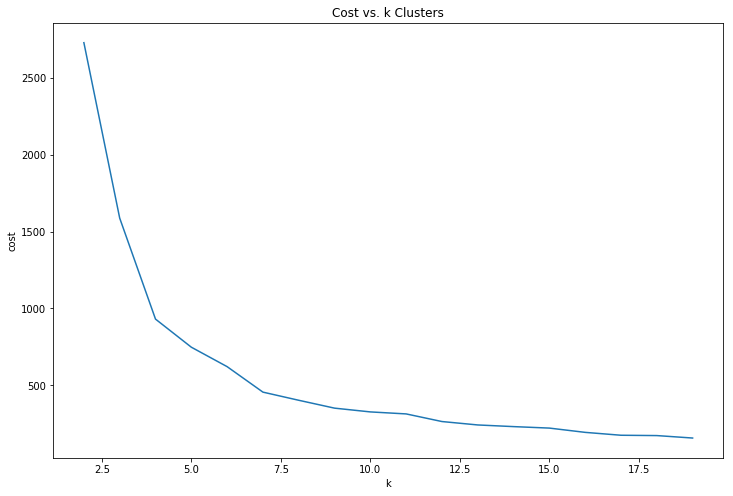

In [351]:
# plot cost vs. k clusters
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize =(12,8))
ax.plot(range(2, 20),cost[2: 20])
ax.set_title('Cost vs. k Clusters')
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [354]:
# Trains a k-means model with optimal k = 7
import time
t0 = time.time()
k = 7
seed = 1
kmeans = KMeans().setK(k).setSeed(seed).setFeaturesCol("features")
model = kmeans.fit(df_feat)
print('It took {:.2f}s to train a model'.format(time.time() - t0))

It took 20.74s to train a model


In [356]:
# get cluster centroid
centers = model.clusterCenters()
print("Cluster Centers: ")
for i, center in enumerate(centers):
    print('cluster', i, center)

Cluster Centers: 
cluster 0 [-122.42275851   37.79231937]
cluster 1 [-120.5   90. ]
cluster 2 [-122.40667558   37.72761081]
cluster 3 [-122.47532046   37.73701921]
cluster 4 [-122.40684978   37.78262579]
cluster 5 [-122.45734704   37.77514772]
cluster 6 [-122.41905823   37.75986438]


In [371]:
# get predictions
df_pred = model.transform(
    df_feat.sample(False,0.005, seed=42)
).select('id', 'prediction').cache()
df_pred.show(5)

+----+----------+
|  id|prediction|
+----+----------+
|   6|         2|
| 115|         3|
|1059|         6|
|1314|         2|
|1516|         5|
+----+----------+
only showing top 5 rows



In [425]:
# join preditions to features
pddf_pred = df_pred.join(df_feat, 'id').toPandas()

In [431]:
# get X, y
pddf_pred['X'] = pddf_pred['features'].apply(lambda x: x[0])
pddf_pred['Y'] = pddf_pred['features'].apply(lambda x: x[1])
pddf_pred.drop('features', axis=1, inplace=True)
pddf_pred.head()

,id,prediction,X,Y
0,6,2,-122.374016,37.729202
1,115,3,-122.444710,37.724930
2,1059,6,-122.406807,37.767761
3,1314,2,-122.396324,37.737278
4,1516,5,-122.449928,37.765316


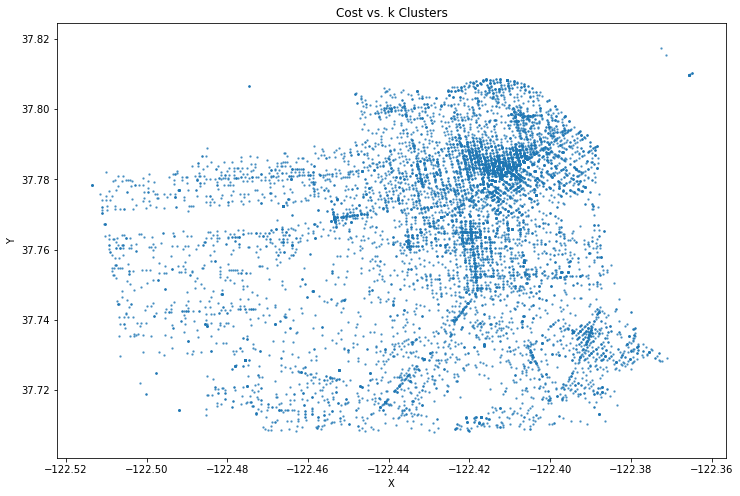

In [439]:
# plot cost vs. k clusters
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize =(12,8))
ax.scatter(pddf_pred.X, pddf_pred.Y, s=2, alpha=0.6)
ax.set_title('Cost vs. k Clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

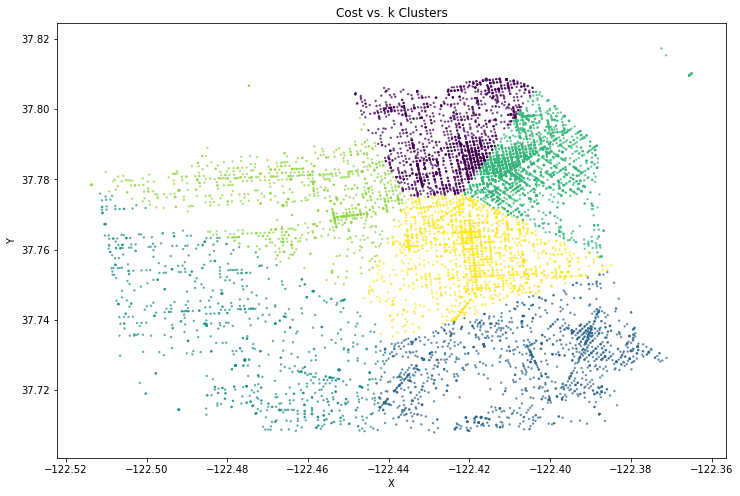

In [440]:
# plot cost vs. k clusters
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize =(12,8))
ax.scatter(pddf_pred.X, pddf_pred.Y, c=pddf_pred.prediction, s=2, alpha=0.6)
ax.set_title('Cost vs. k Clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()